# Decision Tree

## Part I: Classification Decision Tree

### Introduction
Decision Trees are versatile models capable of handling both classification and regression tasks by splitting the data into branches based on feature values. They are particularly useful for interpreting feature importance and understanding how predictions are made. In this notebook, we’ll apply a Decision Tree to the Heart Disease dataset to classify patients as having or not having heart disease based on various health metrics. This experiment highlights the interpretability and predictive power of decision trees in medical datasets.

## 1. Data

In [13]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets
data = pd.concat([X, y], axis=1)
print(data.head())
print("\nData Summary:")
data.info()

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

categorical_features = ['cp', 'thal', 'slope'] 
X_encoded = pd.get_dummies(X_imputed, columns=categorical_features, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nData has been split into training and testing sets.")



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  


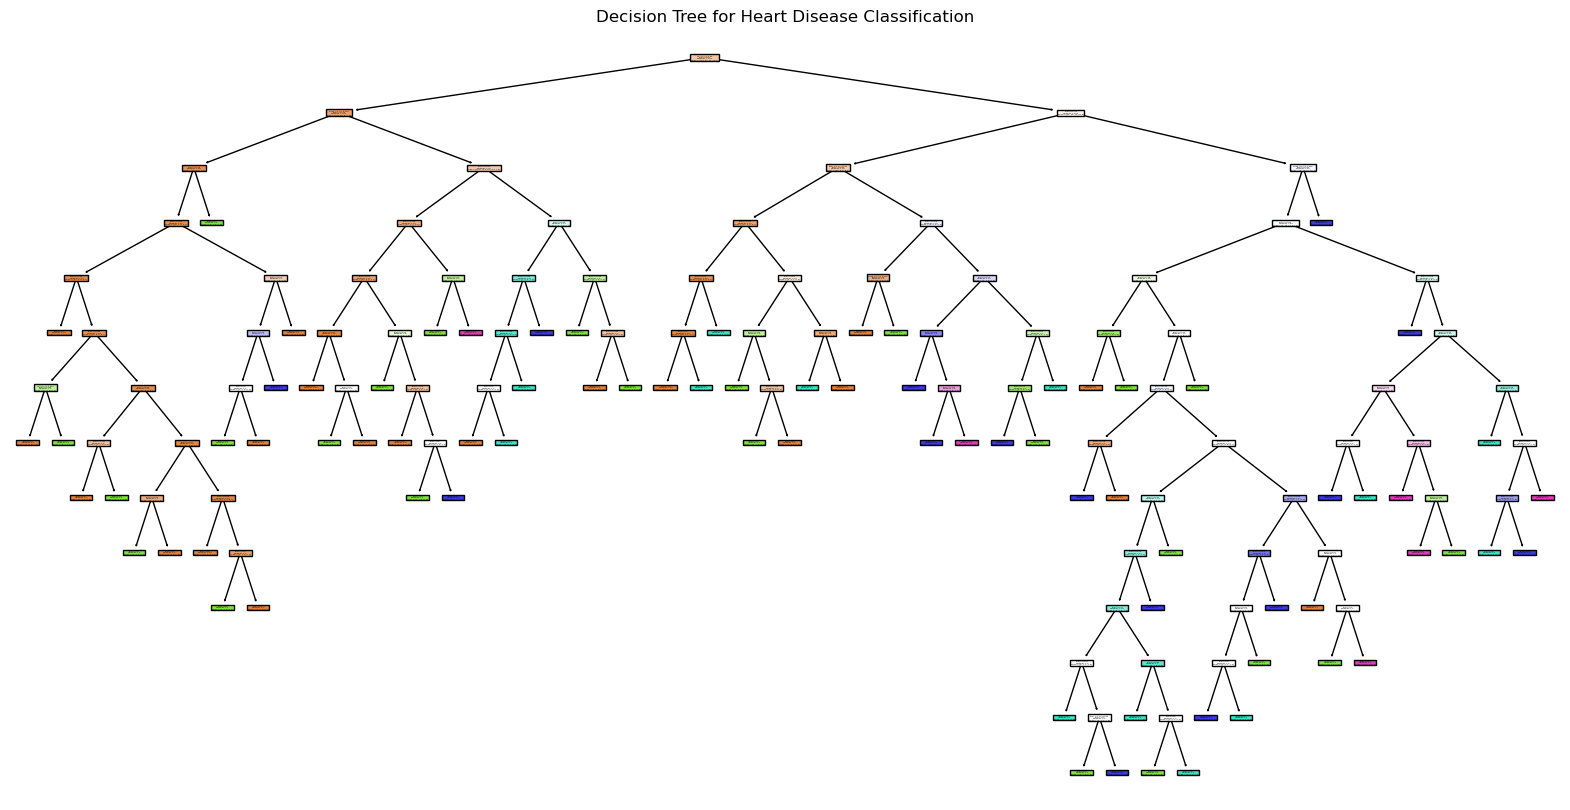

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_encoded.columns)
plt.title("Decision Tree for Heart Disease Classification")
plt.show()



### 3. Evaluation

Accuracy of the Decision Tree model: 0.5082


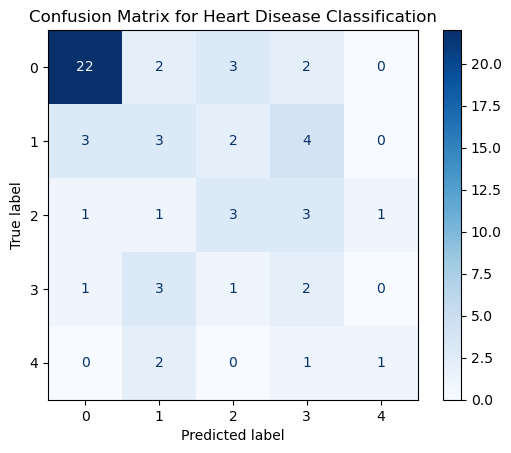

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.27      0.25      0.26        12
           2       0.33      0.33      0.33         9
           3       0.17      0.29      0.21         7
           4       0.50      0.25      0.33         4

    accuracy                           0.51        61
   macro avg       0.42      0.38      0.38        61
weighted avg       0.54      0.51      0.52        61



In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Heart Disease Classification")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

### 4. Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best Cross-Validation Accuracy: 0.5826


### 5. Train and Evaluate the Optimized Decision Tree Model

Adjusted Decision Tree Model Accuracy on Test Set: 0.4590


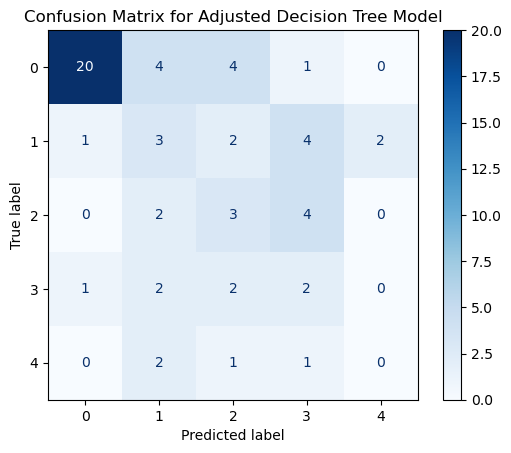

Classification Report for Adjusted Model:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78        29
           1       0.23      0.25      0.24        12
           2       0.25      0.33      0.29         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.31      0.31      0.30        61
weighted avg       0.53      0.46      0.49        61



In [36]:
adjusted_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, class_weight='balanced', random_state=42)
adjusted_tree_model.fit(X_train, y_train)

y_pred_adjusted = adjusted_tree_model.predict(X_test)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f"Adjusted Decision Tree Model Accuracy on Test Set: {accuracy_adjusted:.4f}")

conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_adjusted)
disp_adjusted.plot(cmap="Blues")
plt.title("Confusion Matrix for Adjusted Decision Tree Model")
plt.show()

print("Classification Report for Adjusted Model:")
print(classification_report(y_test, y_pred_adjusted, zero_division=1))


I build a Random Forest classifier and compare its performance with the Decision Tree model. Random Forests generally provide better accuracy and robustness, particularly for complex and imbalanced datasets, as they combine multiple decision trees to improve generalization.

### Train the Random Forest Model

Random Forest Model Accuracy on Test Set: 0.5738


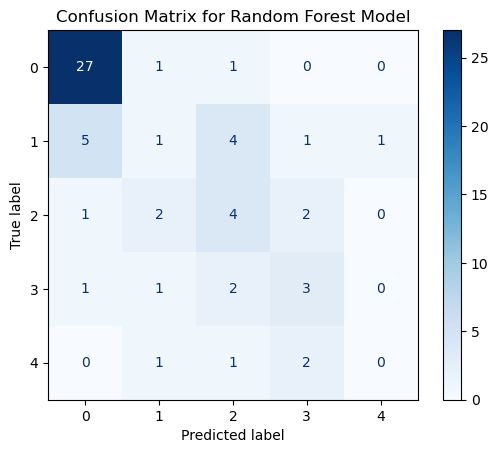

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.17      0.08      0.11        12
           2       0.33      0.44      0.38         9
           3       0.38      0.43      0.40         7
           4       0.00      0.00      0.00         4

    accuracy                           0.57        61
   macro avg       0.33      0.38      0.35        61
weighted avg       0.50      0.57      0.53        61



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, max_depth=6, class_weight='balanced', random_state=42)

# Train 
rf_model.fit(X_train, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy on Test Set: {accuracy_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


### Conclusion
The Random Forest model achieved a moderate accuracy of 57%, performing well in identifying patients without heart disease (class 0) but struggling with other heart disease categories. Despite setting class_weight='balanced', the model showed low precision and recall for minority classes, indicating difficulty in distinguishing among specific heart disease stages. This suggests that, while Random Forest is effective for the majority class, alternative approaches, such as boosting methods or further tuning, may be needed to improve classification for the less common disease categories in this imbalanced dataset.

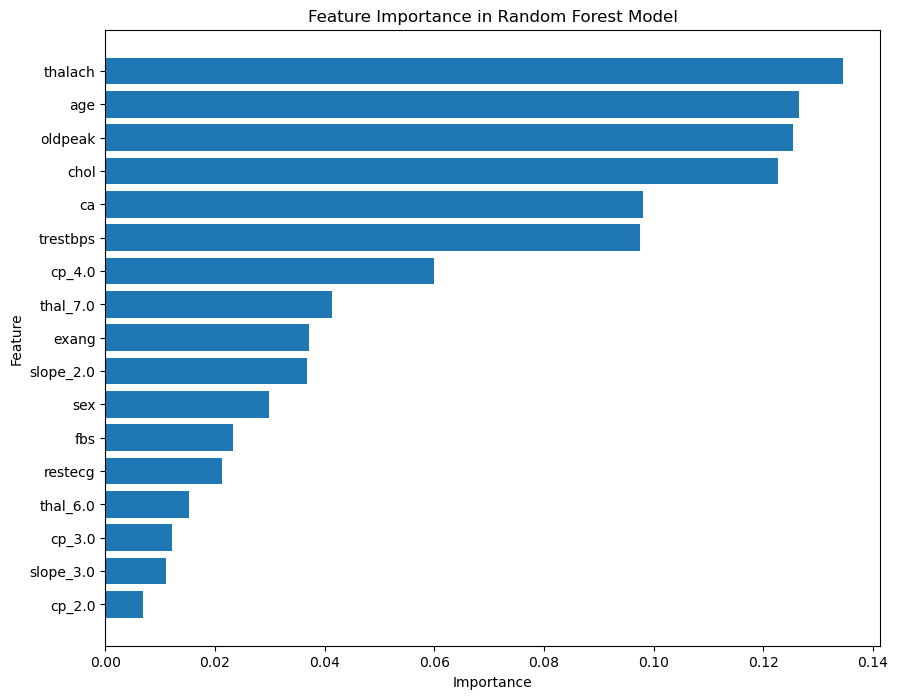

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


## Part II: Regression Decision Tree

### 1. Data

In [50]:
import pandas as pd

data = pd.read_csv('/Users/stitchbleu/577_Project/Data/day.csv')
data.info()
data.head()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = data.drop(['instant', 'dteday'], axis=1)
X = data.drop('cnt', axis=1)
y = data['cnt']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData has been split into training and testing sets.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Data has been split into training and testing sets.


### 2. Build and train model

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

train_score = tree_regressor.score(X_train, y_train)
print(f"Training R^2 Score: {train_score:.4f}")


Training R^2 Score: 1.0000


### 3. Evaluation

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = tree_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Absolute Error (MAE): 142.01
Mean Squared Error (MSE): 40139.59
R^2 Score: 0.9900


### 4.  Hyperparameter Tuning 

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_samples_split': [2, 10, 20]
}

tree_regressor = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation R^2 Score: {best_score:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation R^2 Score: 0.9876


### 5. Train and Evaluate the Optimized Model

In [63]:
optimized_tree_regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)
optimized_tree_regressor.fit(X_train, y_train)

y_pred_optimized = optimized_tree_regressor.predict(X_test)

mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Model Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f"Optimized Model Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Optimized Model R^2 Score: {r2_optimized:.4f}")


Optimized Model Mean Absolute Error (MAE): 138.65
Optimized Model Mean Squared Error (MSE): 40443.87
Optimized Model R^2 Score: 0.9899


### Importance Plot

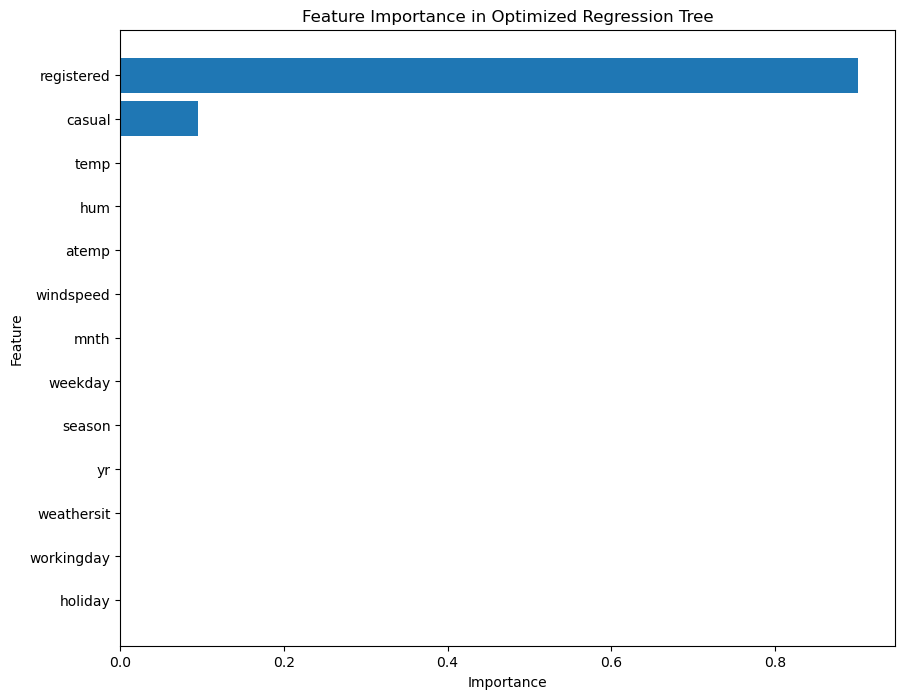

In [65]:
import matplotlib.pyplot as plt

feature_importances = optimized_tree_regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Optimized Regression Tree")
plt.gca().invert_yaxis()
plt.show()


### Predicted vs. Actual Values Plot

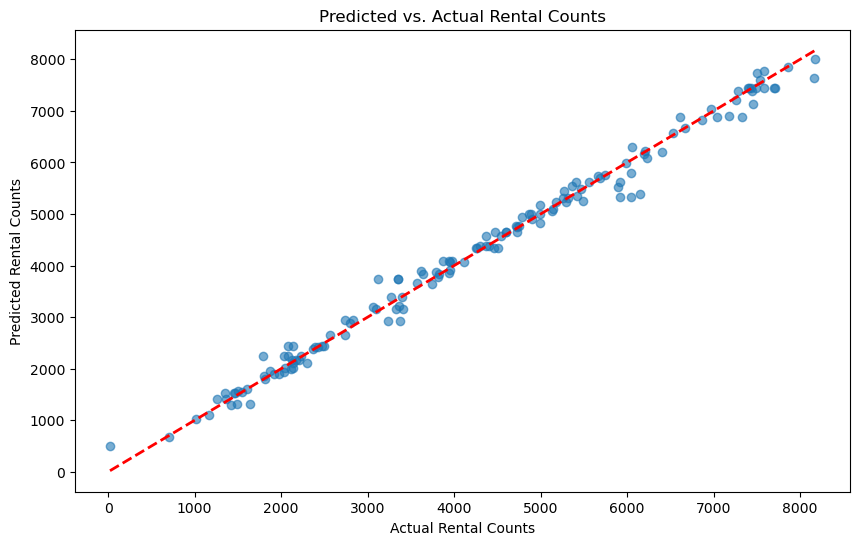

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_optimized, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rental Counts")
plt.ylabel("Predicted Rental Counts")
plt.title("Predicted vs. Actual Rental Counts")
plt.show()

### Optimized Regression Tree Model

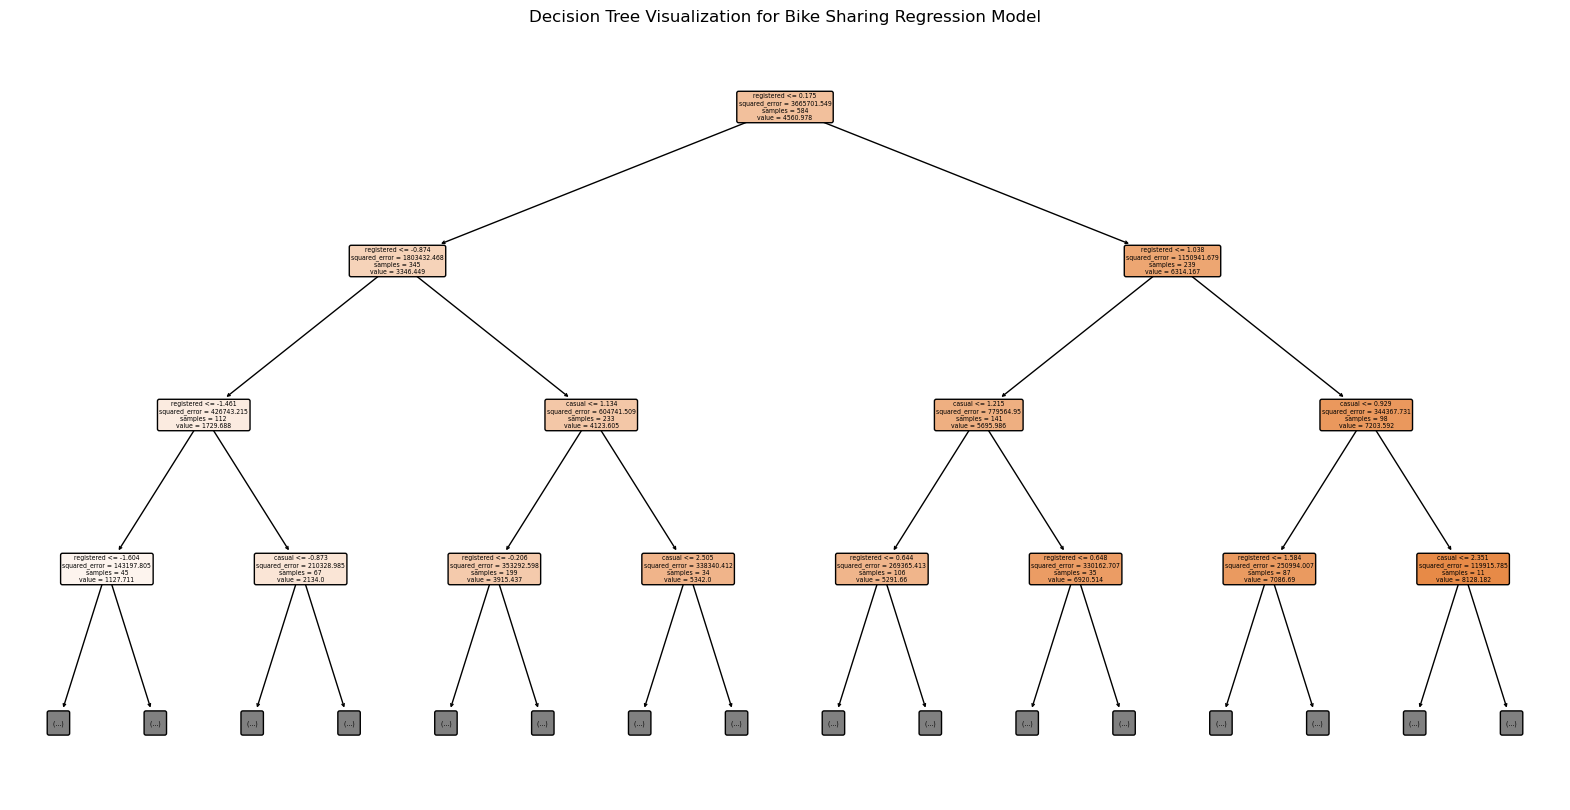

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(
    optimized_tree_regressor,
    feature_names=X.columns, 
    filled=True,
    rounded=True,
    max_depth=3  
)
plt.title("Decision Tree Visualization for Bike Sharing Regression Model")
plt.show()
